# Taller de regresión lineal

## Descripción de los datos


Cargue la capa barrenos corresponde a una capa de muestras tomadas en terreno y en la cual trae información de ubicación, descripción, litología (GEOL), descripción (DESCRIPTIO), espesor en metros de la capas enterradas (Thickness), porcentaje de arcillas (PERCLAY) y permeabilidad metros/dia (PERMEABILI).

In [1]:
## Importar librerias y módulos

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (128, 54)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importamos el archivo CSV

#cargamos los datos de entrada
barrenos = pd.read_csv("https://raw.githubusercontent.com/DiplomadoAI-DL-UNAL2021/samuelmesa/main/taller_regresion_lineal/barrenos.csv")
#veamos cuantas dimensiones y registros contiene
barrenos.shape

(203, 11)

In [3]:
# Explorar los registros

barrenos.head()

,OBJECTID,BOREHOLE,X,Y,GEOL,longitud,latitud,DESCRIPTIO,THICKNESS,PERCCLAY,PERMEABILI
0,1,Bhnr1,830557,1047819,kclp,-75.60529,5.026840,Chloritic/amfibolitic schists,8,60,0.0
1,2,Bhnr2,834314,1047725,inch,-75.57142,5.026069,Gneissic intrusive,4,20,0.9
2,3,Bhnr3,835665,1047825,kis,-75.55925,5.027000,Metasedimentary rock,7,45,0.0
3,4,Bhnr4,836846,1047706,kis,-75.54860,5.025949,Metasedimentary rock,5,45,0.0
4,5,Bhnr5,835888,1047913,qal,-75.55724,5.027801,Recent alluvial material,20,0,3.5


In [4]:
# Despliegue de estadísticas de los datos de entrada

barrenos.describe()

,OBJECTID,X,Y,longitud,latitud,THICKNESS,PERCCLAY,PERMEABILI
count,203.000000,203.000000,2.030000e+02,203.000000,203.000000,203.000000,203.000000,203.000000
mean,102.000000,833251.916256,1.044356e+06,-75.580929,4.995594,11.576355,35.320197,0.846798
std,58.745213,2742.846709,2.025651e+03,0.024717,0.018321,11.950717,19.587856,1.233255
min,1.000000,827291.000000,1.041006e+06,-75.634610,4.965194,2.000000,0.000000,0.000000
25%,51.500000,831482.000000,1.042619e+06,-75.596915,4.979871,4.000000,20.000000,0.000000
50%,102.000000,833656.000000,1.044331e+06,-75.577270,4.995415,7.000000,35.000000,0.100000
75%,152.500000,835657.500000,1.045878e+06,-75.559315,5.009371,9.000000,55.000000,1.000000
max,203.000000,836987.000000,1.047913e+06,-75.547210,5.027801,40.000000,80.000000,3.500000


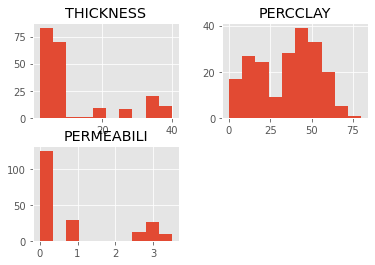

In [5]:
# Visualizamos rápidamente las caraterísticas de entrada
barrenos.drop(['OBJECTID','X', 'Y', 'longitud', 'latitud'],1).hist()
plt.show()

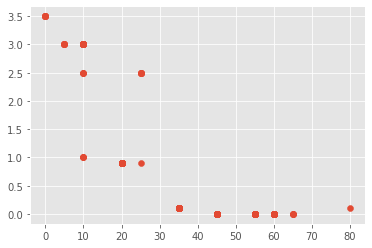

In [18]:
## Realizamos el gráfico de dispersión

porc_arcillas = barrenos["PERCCLAY"].values
espesor = barrenos["THICKNESS"].values
permeabilidad = barrenos["PERMEABILI"].values

plt.scatter(porc_arcillas, permeabilidad)
#plt.scatter(espesor, permeabilidad)
plt.show()

In [7]:
permeabilidad.shape

(203,)


## Regresión lineal con Python


Realizar una regresión lineal simple


In [9]:
data_x = barrenos[["PERCCLAY"]]
X_train = np.array(data_x)
Y_train = permeabilidad

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

#Entrenamos nuestro modelo
regr.fit(X_train, Y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
Y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Y_train, Y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Y_train, Y_pred))

Coefficients: 
 [-0.05394601]
Independent term: 
 2.7521818303158585
Mean squared error: 0.40
Variance score: 0.73


## Visualizamos la recta en el diagrama de dispersión

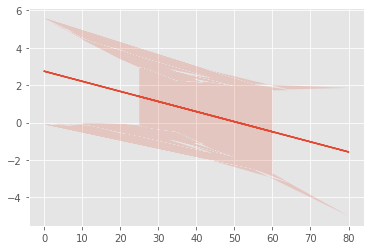

In [10]:
# Predicción de m, b

x_train = porc_arcillas
y_train = permeabilidad

m, b = np.polyfit(x_train, y_train, deg=1)

# Modelo Lineal Simple
y_est = m * x_train + b 
y_err = x_train.std() * np.sqrt(1/len(x_train) +
                          (x_train - x_train.mean())**2 / np.sum((x_train - x_train.mean())**2))


fig, ax = plt.subplots()
ax.plot(X_train, y_est, '-')
ax.fill_between(x_train, y_est - y_err, y_est + y_err, alpha=0.2)
#ax.plot(x_train, y_train, 'o', color='tab:red')
#·ax.plot(x_val, y_val, 'o', color='tab:green')

plt.show()


## Regresión Lineal Múltiple en Python

In [11]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes

dataX2 =  pd.DataFrame()
dataX2["PERCCLAY"] =  barrenos["PERCCLAY"]
dataX2["THICKNESS"] = barrenos["THICKNESS"]

XY_train = np.array(dataX2)
z_train = barrenos["PERMEABILI"].values

In [12]:
## Entrenamiento con SKLearn

# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [-0.03229392  0.05623289]
Mean squared error: 0.13
Variance score: 0.91


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

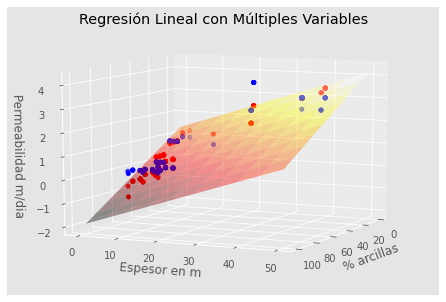

In [15]:
## Visualizar en 3D 

fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 100, num=10), np.linspace(0, 50, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.4, cmap='hot')
 
# Graficamos en azul los puntos en 3D con datos de entrenamiento
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue')
 
# Graficamos en rojo, los puntos inferidos
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red')
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=10, azim=25)
        
ax.set_xlabel('% arcillas')
ax.set_ylabel('Espesor en m')
ax.set_zlabel('Permeabilidad m/dia')
ax.set_title('Regresión Lineal con Múltiples Variables') 